In [1]:
#GET DEPENDENCIES
!pip install transformers
!pip install datasets
!pip install evaluate
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.4 MB/s eta 0:00:00


In [3]:
#MOUNT DRIVE FOR REF FILES
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load BASE PROTGPT2 MODEL
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AutoModelForCausalLM, AutoTokenizer, pipeline
import torch
import math

model = GPT2LMHeadModel.from_pretrained('nferruz/ProtGPT2')
tokenizer = GPT2Tokenizer.from_pretrained('nferruz/ProtGPT2')
protgpt2 = pipeline('text-generation', model=model, tokenizer=tokenizer,device=0)

config.json:   0%|          | 0.00/850 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/655k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/314k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

In [5]:
#load FINETUNED PROTGPT2 MODEL
# replace with path to result1 in your drive
model_path_fine_tuned = '/content/drive/MyDrive/Colabs/result1'
tokenizer_fine_tuned = AutoTokenizer.from_pretrained(model_path_fine_tuned)
model_fine_tuned = AutoModelForCausalLM.from_pretrained(model_path_fine_tuned)

In [6]:
# Create text-generation pipeline w fine-tuned model/tokenizer

# uncomment this line, with "device=0" if using GPU runtime
protgpt2_fine_tuned = pipeline('text-generation', model=model_fine_tuned, tokenizer=tokenizer_fine_tuned, device=0)

# uncomment this line if not using GPU runtime
#protgpt2_fine_tuned = pipeline('text-generation', model=model_fine_tuned, tokenizer=tokenizer_fine_tuned) # no gpu

def calculatePerplexity(sequence, model, tokenizer):
    input_ids = torch.tensor(tokenizer.encode(sequence)).unsqueeze(0)
    input_ids = input_ids.to(model.device)
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
    loss, logits = outputs[:2]
    return math.exp(loss)

In [ ]:
#sample nanobody sequence as input -- first 20 chars
inp = "QVQLQESGGGSVQAGGSLKL"

In [ ]:
i=0
with open("/content/drive/MyDrive/protGPT2_output/ft_seq_7om4.txt", "w") as file:
    # Iterate through the list and write each string to the file
    while i < 160: # generate seqs in batches of 25, due to RAM limitations
      sequences = protgpt2_fine_tuned(inp, min_length=51, max_length=60, do_sample=True, top_k=950, repetition_penalty=1.2, num_return_sequences=25, eos_token_id=0)
      for seq in sequences:
        write_seq = seq['generated_text']
        write_seq = write_seq.replace("\n","")
        file.write(write_seq + "\n")
      i+=1

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token

In [ ]:
# First 20 chars of 5JDS sequence
inp_2 = "MAFTVTVPKDLYVVEYGSNM"

In [ ]:
i=0
with open("/content/drive/MyDrive/protGPT2_output/ft_seq_5jds.txt", "w") as file:
    # Iterate through the list and write each string to the file
    while i < 160: # generate seqs in batches of 25, due to RAM limitations
      sequences = protgpt2_fine_tuned(inp_2, min_length=51, max_length=60, do_sample=True, top_k=950, repetition_penalty=1.2, num_return_sequences=25, eos_token_id=0)
      for seq in sequences:
        write_seq = seq['generated_text']
        write_seq = write_seq.replace("\n","")
        file.write(write_seq + "\n")
      i+=1

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for o

In [ ]:
inp_3 = "MAQVQLVETGGGLVQPGGSL"


In [ ]:
i=0
with open("/content/drive/MyDrive/protGPT2_output/ft_seq_5dxw.txt", "w") as file:
    # Iterate through the list and write each string to the file
    while i < 160: # generate seqs in batches of 25, due to RAM limitations
      sequences = protgpt2_fine_tuned(inp_3, min_length=51, max_length=60, do_sample=True, top_k=950, repetition_penalty=1.2, num_return_sequences=25, eos_token_id=0)
      for seq in sequences:
        write_seq = seq['generated_text']
        write_seq = write_seq.replace("\n","")
        file.write(write_seq + "\n")
      i+=1

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for o

In [ ]:
i=0
with open("/content/drive/MyDrive/protGPT2_output/base_seq_7om4.txt", "w") as file:
    # Iterate through the list and write each string to the file
    while i < 160: # generate seqs in batches of 25, due to RAM limitations
      sequences = protgpt2(inp, min_length=51, max_length=60, do_sample=True, top_k=950, repetition_penalty=1.2, num_return_sequences=25, eos_token_id=0)
      for seq in sequences:
        write_seq = seq['generated_text']
        write_seq = write_seq.replace("\n","")
        file.write(write_seq + "\n")
      i+=1

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for o

In [ ]:
i=0
with open("/content/drive/MyDrive/protGPT2_output/base_seq_5jds.txt", "w") as file:
    # Iterate through the list and write each string to the file
    while i < 160: #generate 3125 seq in batches of 25, due to RAM limitations
      sequences = protgpt2(inp_2, min_length=51, max_length=60, do_sample=True, top_k=950, repetition_penalty=1.2, num_return_sequences=25, eos_token_id=0)
      for seq in sequences:
        write_seq = seq['generated_text']
        write_seq = write_seq.replace("\n","")
        file.write(write_seq + "\n")
      i+=1

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for o

In [ ]:
i=0
with open("/content/drive/MyDrive/protGPT2_output/base_seq_5dxw.txt", "w") as file:
    # Iterate through the list and write each string to the file
    while i < 160: # generate seqs in batches of 25, due to RAM limitations
      sequences = protgpt2(inp_3, min_length=51, max_length=60, do_sample=True, top_k=950, repetition_penalty=1.2, num_return_sequences=25, eos_token_id=0)
      for seq in sequences:
        write_seq = seq['generated_text']
        write_seq = write_seq.replace("\n","")
        file.write(write_seq + "\n")
      i+=1

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for o

In [ ]:
'''
#calculate perplexity on fine-tuned samples
perplexity_list_ft_7om4 = []
fp_7om4 = "/content/drive/MyDrive/protGPT2_output/ft_seq_7om4.txt"
with open(fp_7om4, 'r') as file:
    for seq in file:
      perplexity_list_ft_7om4.append(calculatePerplexity(seq, model_fine_tuned, tokenizer_fine_tuned))

perplexity_list_ft_5jds = []
fp_5jds_ft = "/content/drive/MyDrive/protGPT2_output/ft_seq_5jds.txt"
with open(fp_5jds_ft, 'r') as file:
    for seq in file:
      perplexity_list_ft_5jds.append(calculatePerplexity(seq, model_fine_tuned, tokenizer_fine_tuned))


perplexity_list_ft_5dxw = []
fp_5dxw_ft = "/content/drive/MyDrive/protGPT2_output/ft_seq_5dxw.txt"
with open(fp_5dxw_ft, 'r') as file:
    for seq in file:
      perplexity_list_ft_5dxw.append(calculatePerplexity(seq, model_fine_tuned, tokenizer_fine_tuned))

'''

In [7]:
# calculate perplexity on base samples
perplexity_list_base_7om4 = []
fp_base_7om4 = "/content/drive/MyDrive/protGPT2_output/base_seq_7om4.txt"
with open(fp_base_7om4, 'r') as file:
    for seq in file:
      perplexity_list_base_7om4.append(calculatePerplexity(seq, model, tokenizer))

In [8]:
perplexity_list_base_5jds = []
fp_base_5jds = "/content/drive/MyDrive/protGPT2_output/base_seq_5jds.txt"
with open(fp_base_5jds, 'r') as file:
    for seq in file:
      perplexity_list_base_5jds.append(calculatePerplexity(seq, model, tokenizer))

In [9]:
perplexity_list_base_5dxw = []
fp_base_5dxw = "/content/drive/MyDrive/protGPT2_output/base_seq_5dxw.txt"
with open(fp_base_5dxw, 'r') as file:
    for seq in file:
      perplexity_list_base_5dxw.append(calculatePerplexity(seq, model, tokenizer))

In [10]:
#calculate perplexity on fine-tuned samples
perplexity_list_ft_7om4 = []
fp_7om4_ft = "/content/drive/MyDrive/protGPT2_output/ft_seq_7om4.txt"
ft_7om4_sequences = []
with open(fp_7om4_ft, 'r') as file:
    for seq in file:
      ft_7om4_sequences.append(seq)
      perplexity_list_ft_7om4.append(calculatePerplexity(seq, model_fine_tuned, tokenizer_fine_tuned))


perplexity_list_ft_5jds = []
fp_5jds_ft = "/content/drive/MyDrive/protGPT2_output/ft_seq_5jds.txt"
ft_5jds_sequences = []
with open(fp_5jds_ft, 'r') as file:
    for seq in file:
      ft_5jds_sequences.append(seq)
      perplexity_list_ft_5jds.append(calculatePerplexity(seq, model_fine_tuned, tokenizer_fine_tuned))


perplexity_list_ft_5dxw = []
fp_5dxw_ft = "/content/drive/MyDrive/protGPT2_output/ft_seq_5dxw.txt"
ft_5dxw_sequences = []
with open(fp_5dxw_ft, 'r') as file:
    for seq in file:
      ft_5dxw_sequences.append(seq)
      perplexity_list_ft_5dxw.append(calculatePerplexity(seq, model_fine_tuned, tokenizer_fine_tuned))

In [15]:
import scipy.stats as stats
_, p_value = stats.mannwhitneyu(perplexity_list_base_7om4, perplexity_list_ft_7om4)
print("p-value: {:.12f}".format(p_value))

p-value: 0.000000000000


In [16]:
_, p_value = stats.mannwhitneyu(perplexity_list_base_5jds, perplexity_list_ft_5jds)
print("p-value: {:.12f}".format(p_value))

p-value: 0.000000000000


In [17]:
_, p_value = stats.mannwhitneyu(perplexity_list_base_5dxw, perplexity_list_ft_5dxw)
print("p-value: {:.12f}".format(p_value))

p-value: 0.000000000000


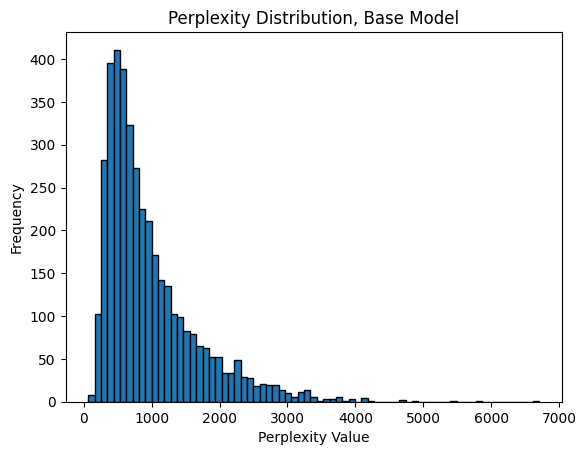

In [13]:
import matplotlib.pyplot as plt
plt.hist(perplexity_list_base_7om4, bins='auto', edgecolor='black')
plt.xlabel('Perplexity Value')
plt.ylabel('Frequency')
plt.title('Perplexity Distribution, Base Model')
plt.show()

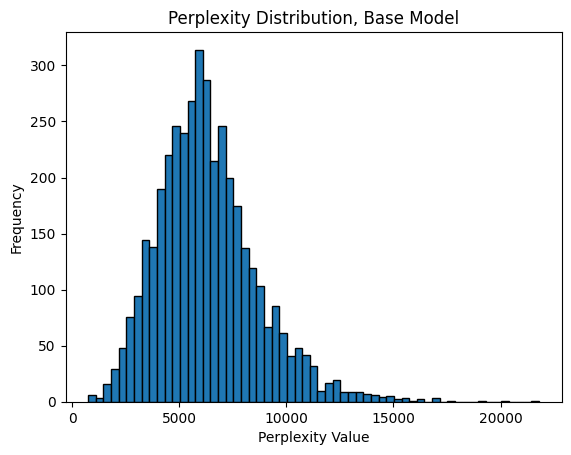

In [14]:
plt.hist(perplexity_list_base_5jds, bins='auto', edgecolor='black')
plt.xlabel('Perplexity Value')
plt.ylabel('Frequency')
plt.title('Perplexity Distribution, Base Model')
plt.show()

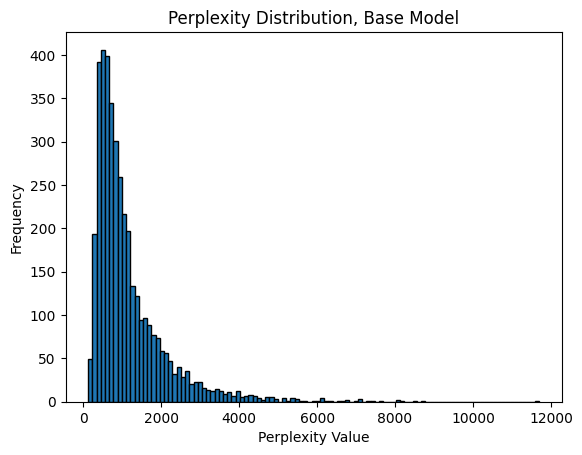

In [15]:
plt.hist(perplexity_list_base_5dxw, bins='auto', edgecolor='black')
plt.xlabel('Perplexity Value')
plt.ylabel('Frequency')
plt.title('Perplexity Distribution, Base Model')
plt.show()

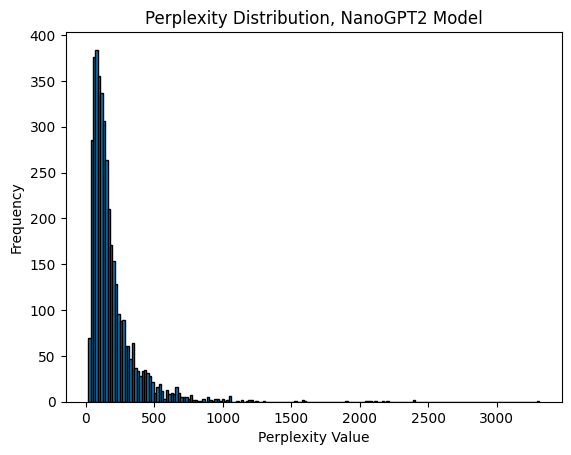

In [16]:
plt.hist(perplexity_list_ft_7om4, bins='auto', edgecolor='black')
plt.xlabel('Perplexity Value')
plt.ylabel('Frequency')
plt.title('Perplexity Distribution, NanoGPT2 Model')
plt.show()

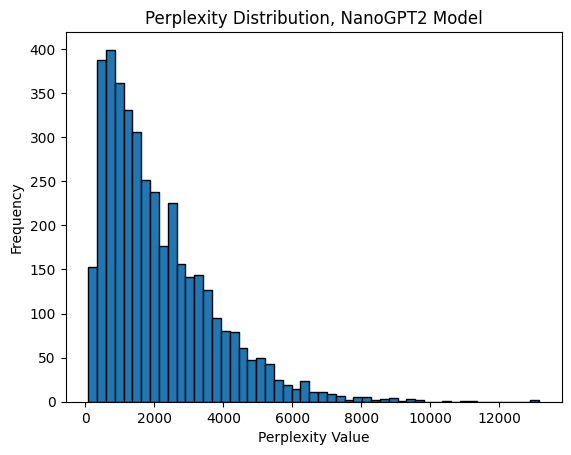

In [17]:
plt.hist(perplexity_list_ft_5jds, bins='auto', edgecolor='black')
plt.xlabel('Perplexity Value')
plt.ylabel('Frequency')
plt.title('Perplexity Distribution, NanoGPT2 Model')
plt.show()

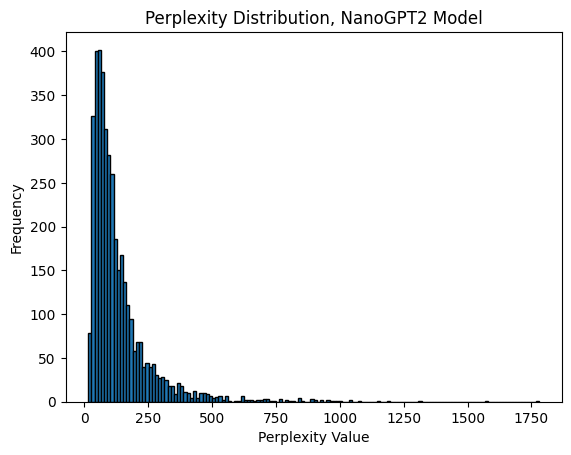

In [18]:
plt.hist(perplexity_list_ft_5dxw, bins='auto', edgecolor='black')
plt.xlabel('Perplexity Value')
plt.ylabel('Frequency')
plt.title('Perplexity Distribution, NanoGPT2 Model')
plt.show()

In [ ]:
print(sum(perplexity_list_ft_7om4)/3125)
print(sum(perplexity_list_base_7om4)/3125)
print("")
print(sum(perplexity_list_ft_5jds)/3125)
print(sum(perplexity_list_base_5jds)/3125)
print("")
print(sum(perplexity_list_ft_5dxw)/3125)
print(sum(perplexity_list_base_5dxw)/3125)



244.9727873397657
1238.9232272766744

2696.025070082015
8098.745283107783

169.32457756754803
1480.079143929631


In [19]:
print(sum(perplexity_list_ft_7om4)/4000)
print(sum(perplexity_list_base_7om4)/4000)
print("")
print(sum(perplexity_list_ft_5jds)/4000)
print(sum(perplexity_list_base_5jds)/4000)
print("")
print(sum(perplexity_list_ft_5dxw)/4000)
print(sum(perplexity_list_base_5dxw)/4000)

191.38499010919193
967.9087713099018

2106.2695860015747
6327.144752427956

132.2848262246469
1156.3118311950243


In [ ]:
# combine sequence lists and perplexity lists
combined_7om4 = list(zip(ft_7om4_sequences, perplexity_list_ft_7om4))
combined_5jds = list(zip(ft_5jds_sequences, perplexity_list_ft_5jds))
combined_5dxw = list(zip(ft_5dxw_sequences, perplexity_list_ft_5dxw))


# sort by perplexity
sorted_7om4 = sorted(combined_7om4, key=lambda x: x[1])
sorted_5jds = sorted(combined_5jds, key=lambda x: x[1])
sorted_5dxw = sorted(combined_5dxw, key=lambda x: x[1])

# Extract top three sequences
top3_7om4 = sorted_7om4[:3]
top3_5jds = sorted_5jds[:3]
top3_5dxw = sorted_5dxw[:3]

print("Top 3 sequences in ft_7om4_sequences:")
for seq, score in top3_7om4:
    print(f"Sequence: {seq} Perplexity: {score}")

print("\nTop 3 sequences in ft_5jds_sequences:")
for seq, score in top3_5jds:
    print(f"Sequence: {seq} Perplexity: {score}")

print("\nTop 3 sequences in ft_5dxw_sequences:")
for seq, score in top3_5dxw:
    print(f"Sequence: {seq} Perplexity: {score}")

Top 3 sequences in ft_7om4_sequences:
Sequence: QVQLQESGGGSVQAGGSLKLTCAASGFTFDDYAIGWFRQAPGKEREGVSCISSSDGSTYYADSVKGRFTISRDNARNTVYLQMNSLKPEDTAVYYCAKDGCDYQRGIGYWGQGTQVTVSSWGQGTQVTVXS
 Perplexity: 18.770809027227816
Sequence: QVQLQESGGGSVQAGGSLKLTCVASGFTFDDYAIGWFRQAPGKEREGVSCISSSDGSTYYADSVKGRFTISRDNAKNTVYLQMNSLKSEDTAVYYCNAERTCISPYDYWGQGTQVTVSSGNWGQGTQVTVSS
 Perplexity: 19.62814905393521
Sequence: QVQLQESGGGSVQAGGSLKLTCTASGFTFDDYAIGWFRQAPGKEREGVSCISGSDGTTYYADSVKGRFTISRDNAKNTVYLQMNSLKPEDTAVYFCAADCGLGPDGRYWGQGTQVTVSSGSWGKGTQVTVS
 Perplexity: 20.40603145713989

Top 3 sequences in ft_5jds_sequences:
Sequence: MAFTVTVPKDLYVVEYGSNMSMNCTSSQSALTINAMGWYRQAPGKQRELVATITTGGTTYYSDSVKGRFTISRDNAENTVYLQMNSLKPEDTAVYYCNVNVMGNGYWGQQGTWGQGTQVTVSS
 Perplexity: 82.58691559498892
Sequence: MAFTVTVPKDLYVVEYGSNMRVSCTASGSIFSINTMGWYRQAPGKQRELVATMSSSGSTNYADAVKGRFTISRDNAKNTVYLQMNSLKPEDTAVYYCAAGRCGTAAGSYYDVETWGEWGQGTQVTVSSNI
 Perplexity: 100.24678754253142
Sequence: MAFTVTVPKDLYVVEYGSNMWLGCQSQANMSNYSVGWFRQIPGKEREGVSCISS

In [ ]:
print(len(perplexity_list_ft_7om4))
print(len(perplexity_list_base_7om4))

print(len(perplexity_list_ft_5jds))
print(len(perplexity_list_base_5jds))

print(len(perplexity_list_ft_5dxw))
print(len(perplexity_list_base_5dxw))



4000
4000
4000
4000
4000
4000


In [ ]:
inp = "M"
i=0
with open("/content/drive/MyDrive/protGPT2_output/ft_seq_blank.txt", "w") as file:
    # Iterate through the list and write each string to the file
    while i < 200: #generate seqs in batches of 25, due to RAM limitations
      sequences = protgpt2_fine_tuned(inp, min_length=100, max_length=200, do_sample=True, top_k=950, repetition_penalty=1.2, num_return_sequences=25, eos_token_id=0)
      for seq in sequences:
        write_seq = seq['generated_text']
        write_seq = write_seq.replace("\n","")
        file.write(write_seq + "\n")
      i+=1

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token

In [ ]:
i=0
with open("/content/drive/MyDrive/protGPT2_output/base_seq_blank.txt", "w") as file:
    # Iterate through the list and write each string to the file
    while i < 200: # generate seqs in batches of 25, due to RAM limitations
      sequences = protgpt2(inp, min_length=100, max_length=200, do_sample=True, top_k=950, repetition_penalty=1.2, num_return_sequences=25, eos_token_id=0)
      for seq in sequences:
        write_seq = seq['generated_text']
        write_seq = write_seq.replace("\n","")
        file.write(write_seq + "\n")
      i+=1

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for o

In [ ]:
perplexity_list_base_blank = []
fp_base_blank = "/content/drive/MyDrive/protGPT2_output/base_seq_blank.txt"
with open(fp_base_blank, 'r') as file:
    for seq in file:
      perplexity_list_base_blank.append(calculatePerplexity(seq, model, tokenizer))


perplexity_list_ft_blank = []
fp_ft_blank = "/content/drive/MyDrive/protGPT2_output/ft_seq_blank.txt"
with open(fp_ft_blank, 'r') as file:
    for seq in file:
      perplexity_list_ft_blank.append(calculatePerplexity(seq, model_fine_tuned, tokenizer_fine_tuned))


In [ ]:
print(len(perplexity_list_ft_blank))
print(len(perplexity_list_base_blank))
print("")
print(sum(perplexity_list_ft_blank)/5000)
print(sum(perplexity_list_base_blank)/5000)


5000
5000

596.877028211727
1883.4640330088682


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
plt.hist(perplexity_list_base_blank, bins='auto', edgecolor='black')
plt.xlabel('Perplexity Value')
plt.ylabel('Frequency')
plt.title('Perplexity Distribution for "M" input, Base Model')
plt.show()


In [ ]:
plt.hist(perplexity_list_ft_blank, bins='auto', edgecolor='black')
plt.xlabel('Perplexity Value')
plt.ylabel('Frequency')
plt.title('Perplexity Distribution for "M" input, Fine-Tuned Model')
plt.show()


In [ ]:
# combine perplexity_list_ft_7om4, perplexity_list_ft_5jds, perplexity_list_ft_5dxw, perplexity_list_base_5dxw into a single list
combined_ft = perplexity_list_ft_7om4 + perplexity_list_ft_5jds + perplexity_list_ft_5dxw
print(len(combined_ft))

# combine perplexity_list_base_7om4, perplexity_list_base_5jds, perplexity_list_base_5dxw into a single list
combined_base = perplexity_list_base_7om4 + perplexity_list_base_5jds + perplexity_list_base_5dxw
print(len(combined_base))
